# Risk Segmentation and Strategy Modeling
In this notebook, we classify risk levels using score thresholds and analyze performance across bins.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import roc_auc_score, confusion_matrix

In [2]:
# Load model and data
model = joblib.load('../models/xgboost_model.pkl')  # or best_model.pkl
df = pd.read_csv('../outputs/woe_train_data.csv')
X = df.drop(columns='SeriousDlqin2yrs')
y = df['SeriousDlqin2yrs']
df['score'] = model.predict_proba(X)[:,1]  # score = risk probability

## Define Risk Levels (e.g. Good / Medium / Bad)

In [3]:
# Define bins by score quantiles or thresholds
df['risk_level'] = pd.cut(df['score'], 
    bins=[-np.inf, 0.2, 0.5, 0.8, np.inf], 
    labels=['Low', 'Medium', 'High', 'Critical'])

## Evaluate Performance per Risk Group

In [4]:
# Bad rate per group
group_stats = df.groupby('risk_level')['SeriousDlqin2yrs'].agg(['count','mean'])
group_stats.columns = ['Count', 'Default_Rate']
group_stats = group_stats.sort_index()
group_stats

/var/folders/7n/jsxq10792314ly6yrv8s3vn80000gn/T/ipykernel_316/2589590610.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = df.groupby('risk_level')['SeriousDlqin2yrs'].agg(['count','mean'])


,Count,Default_Rate
risk_level,,
Low,136499,0.033180
Medium,10075,0.320496
High,3089,0.644545
Critical,337,0.821958


### Plot Bad Rate by Risk Level

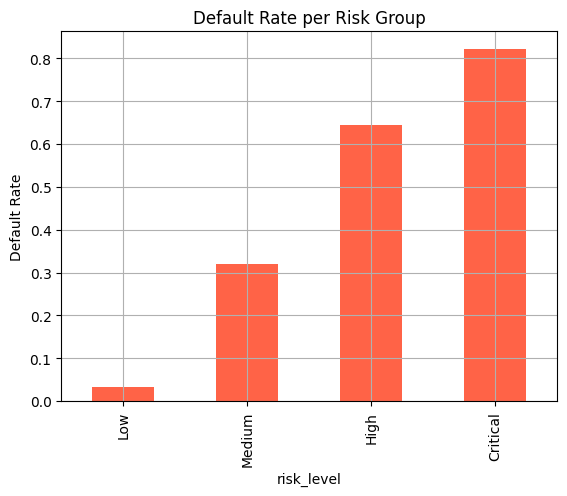

In [5]:
group_stats['Default_Rate'].plot(kind='bar', color='tomato', title='Default Rate per Risk Group')
plt.ylabel('Default Rate')
plt.grid(True)
plt.show()

## Export Scored Dataset

In [6]:
df.to_csv('../outputs/scored_with_risk_levels.csv', index=False)
print('Saved scored dataset with risk levels.')

Saved scored dataset with risk levels.
